# Ejemplo con usuarios de Twitter

### Importación de librerías

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin_min

%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')

### Mostramos 5 registros del dataset para tener un overview

In [4]:
df = pd.read_csv("DataSets/analisis.csv")
df.head()

,usuario,op,co,ex,ag,ne,wordcount,categoria
0,3gerardpique,34.297953,28.148819,41.948819,29.370315,9.841575,37.0945,7
1,aguerosergiokun,44.986842,20.525865,37.938947,24.279098,10.362406,78.7970,7
2,albertochicote,41.733854,13.745417,38.999896,34.645521,8.836979,49.2604,4
3,AlejandroSanz,40.377154,15.377462,52.337538,31.082154,5.032231,80.4538,2
4,alfredocasero1,36.664677,19.642258,48.530806,31.138871,7.305968,47.0645,4


In [32]:
df.groupby('categoria').size().to_frame()

,0
categoria,
1,27
2,34
3,9
4,19
5,4
6,8
7,17
8,16
9,6


<ul>
    <li>usuario (el nombre en Twitter)</li>
    <li>«op» = Openness to experience – grado de apertura mental a nuevas experiencias, curiosidad, arte</li>
    <li>«co» =Conscientiousness – grado de orden, prolijidad, organización</li>
    <li>«ex» = Extraversion – grado de timidez, solitario o participación ante el grupo social</li>
    <li>«ag» = Agreeableness – grado de empatía con los demás, temperamento</li>
    <li>«ne» = Neuroticism, – grado de neuroticismo, nervioso, irritabilidad, seguridad en sí mismo.</li>
    <li>Wordcount – Cantidad promedio de palabras usadas en sus tweets</li>
    <li>Categoria – Actividad laboral del usuario (actor, cantante, etc.)</li>
</ul>
   
    
    
    
    
    
    
    


### Estadística básica de las columnas numéricas

In [5]:
df.describe()

,op,co,ex,ag,ne,wordcount,categoria
count,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000
mean,44.414591,22.977135,40.764428,22.918528,8.000098,98.715484,4.050000
std,8.425723,5.816851,7.185246,7.657122,3.039248,44.714071,2.658839
min,30.020465,7.852756,18.693542,9.305985,1.030213,5.020800,1.000000
25%,38.206484,19.740299,36.095722,17.050993,6.086144,66.218475,2.000000
50%,44.507091,22.466718,41.457492,21.384554,7.839722,94.711400,3.500000
75%,49.365923,26.091606,45.197769,28.678867,9.758189,119.707925,7.000000
max,71.696129,49.637863,59.824844,40.583162,23.978462,217.183200,9.000000


### Dispersión de los datos

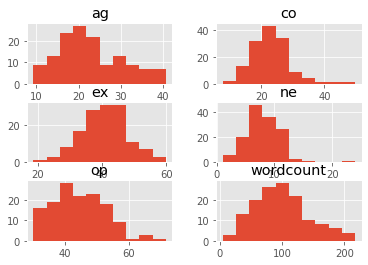

In [6]:
df.drop(['categoria'],1).hist() #Quitamos la columna de categoría
plt.show()

### Cruce de 3 variables (op, ex y ag) para ver pistas de alguna posible agrupación y relación con sus categorías

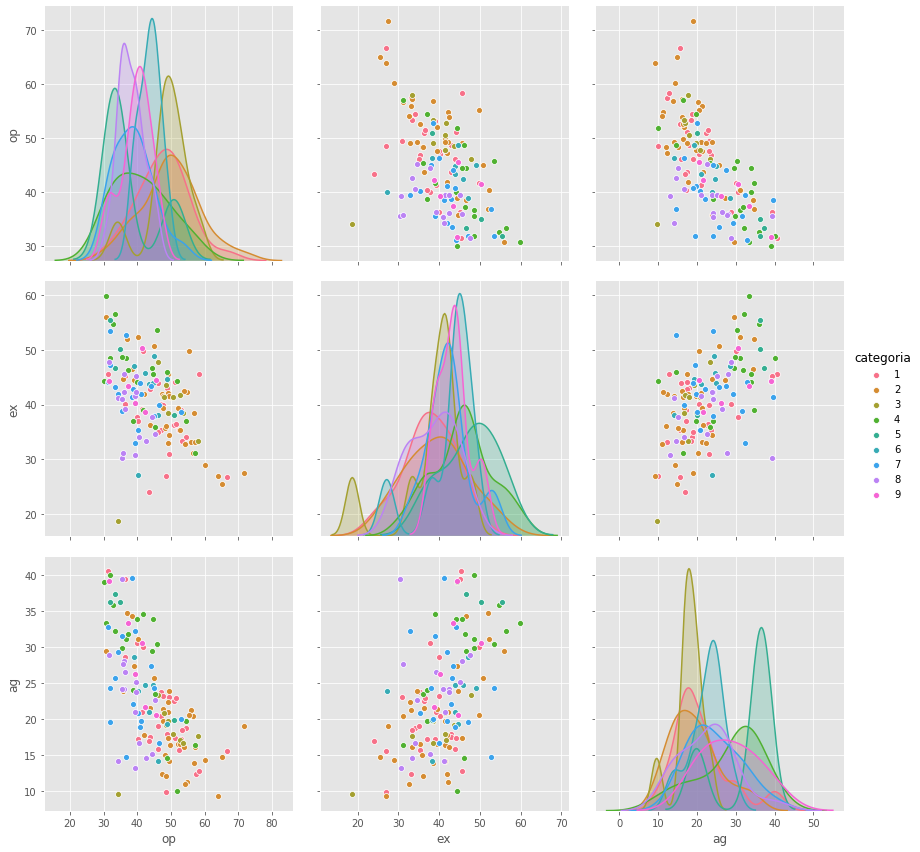

In [9]:
sb.pairplot(df.dropna(), hue='categoria',height=4,vars=["op","ex","ag"],kind='scatter')

### Se define la entrada para el algoritmo, en este caso sólo se utilizarán las columnas op, ex y ag para la variable "x" y categoría para "y"

In [2]:
X = np.array(df[["op","ex","ag"]])
y = np.array(df['categoria'])
y.shape

NameError: name 'np' is not defined

### Gráfica en 3D con 9 colores representando las categorías

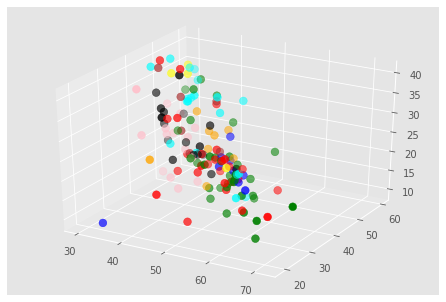

In [11]:
fig = plt.figure()
ax = Axes3D(fig)
colores=['blue','red','green','blue','cyan','yellow','orange','black','pink','brown','purple']
asignar=[]
for row in y:
    asignar.append(colores[row])
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=asignar,s=60)

### Hayando el valor adecuado de k "punto de codo"
#### La curva es bastante suave por lo tanto 5 sería un buen número para k

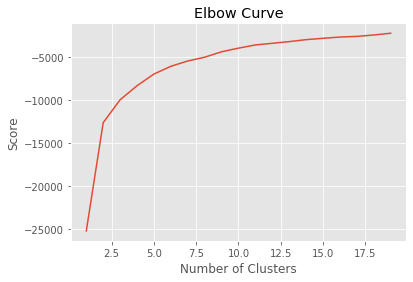

In [12]:
Nc = range(1, 20)
kmeans = [KMeans(n_clusters=i) for i in Nc]
kmeans
score = [kmeans[i].fit(X).score(X) for i in range(len(kmeans))]
score
plt.plot(Nc,score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

### Se ejecuta el algoritmo para 5 clusers y obtenemos las etiquetas y los centroides.

In [13]:
kmeans = KMeans(n_clusters=5).fit(X)
centroids = kmeans.cluster_centers_
print(centroids)

[[43.42489342 32.20419121 19.27634421]
 [35.90241306 47.56828232 33.58748762]
 [50.73809617 40.40047483 17.42637107]
 [60.35359892 30.299381   15.71781133]
 [40.22889929 42.87666588 23.44923068]]


### Gráfica 3D con colores para los grupos 

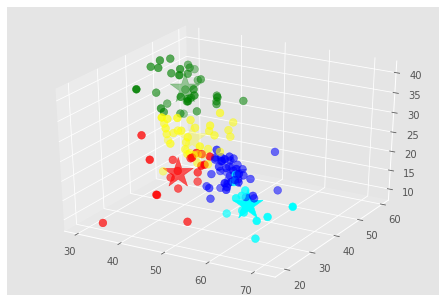

In [15]:
# Predicting the clusters
labels = kmeans.predict(X)
# Getting the cluster centers
C = kmeans.cluster_centers_
colores=['red','green','blue','cyan','yellow']
asignar=[]
for row in labels:
    asignar.append(colores[row])
 
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=asignar,s=60)
ax.scatter(C[:, 0], C[:, 1], C[:, 2], marker='*', c=colores, s=1000)

### 3 gráficas en 2 dimensiones con las proyecciones a partir de la gráfica 3D para visualizar los grupos y su clasificación 

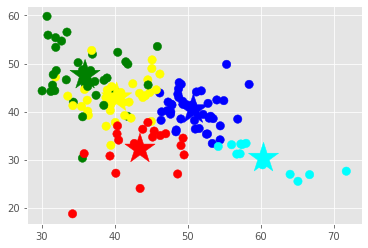

In [17]:
# Getting the values and plotting it
f1 = df['op'].values
f2 = df['ex'].values
 
plt.scatter(f1, f2, c=asignar, s=70)
plt.scatter(C[:, 0], C[:, 1], marker='*', c=colores, s=1000)
plt.show()

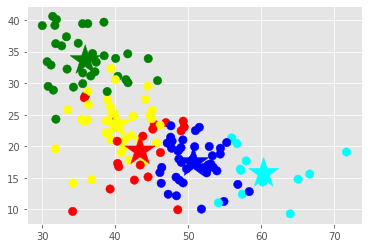

In [19]:
# Getting the values and plotting it
f1 = df['op'].values
f2 = df['ag'].values
 
plt.scatter(f1, f2, c=asignar, s=70)
plt.scatter(C[:, 0], C[:, 2], marker='*', c=colores, s=1000)
plt.show()

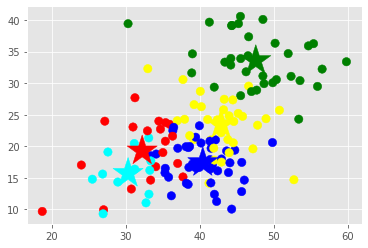

In [21]:
f1 = df['ex'].values
f2 = df['ag'].values
 
plt.scatter(f1, f2, c=asignar, s=70)
plt.scatter(C[:, 1], C[:, 2], marker='*', c=colores, s=1000)
plt.show()

### Cuántos usuarios tiene cada cluster

In [22]:
copy =  pd.DataFrame()
copy['usuario']=df['usuario'].values
copy['categoria']=df['categoria'].values
copy['label'] = labels;
cantidadGrupo =  pd.DataFrame()
cantidadGrupo['color']=colores
cantidadGrupo['cantidad']=copy.groupby('label').size()
cantidadGrupo

,color,cantidad
0,red,19
1,green,34
2,blue,41
3,cyan,12
4,yellow,34


### Diversidad en rubros laborales de cada uno, por ejemplo el grupo 0 (rojo) predominan la categoría 1 y 2 (Cantantes y Famosos)

In [33]:
group_referrer_index = copy['label'] ==0
group_referrals = copy[group_referrer_index]
 
diversidadGrupo =  pd.DataFrame()
diversidadGrupo['categoria']=[0,1,2,3,4,5,6,7,8,9]
diversidadGrupo['cantidad']=group_referrals.groupby('categoria').size()
diversidadGrupo

,categoria,cantidad
0,0,NaN
1,1,6.0
2,2,3.0
3,3,1.0
4,4,1.0
5,5,NaN
6,6,1.0
7,7,1.0
8,8,6.0
9,9,NaN


### Usuarios más cercanos a los centroides 

In [34]:
#vemos el representante del grupo, el usuario cercano a su centroid
closest, _ = pairwise_distances_argmin_min(kmeans.cluster_centers_, X)
closest

array([123,  98,  21,  53,  64], dtype=int64)

In [36]:
users=df['usuario'].values
for row in closest:
    print(users[row])

SJP
maria_patino
carmenelectra
foofighters
ierrejon


### Clasificar nuevas muestras

In [37]:
X_new = np.array([[45.92,57.74,15.66]]) #davidguetta
 
new_labels = kmeans.predict(X_new)
print(new_labels)

[4]
